# e-statAPIから入手した人口データの統計
## 1. 事前に
### 1.1. 人口データをe-statから入手
- http://www.e-stat.go.jp/api/api-data/ から国税調査の政府統計データを調べる。
- APIから国勢調査の情報ファイルを入手(json形式)。
```shell
curl -s 'http://api.e-stat.go.jp/rest/2.1/app/json/getStatsList?appId=<appID>&statsCode=00200521' > census.json
```
- そのファイルから「年齢別・男女別人口」のデータセットIDを調べる。
- そのデータセットIDを用いて、人口データをAPIから入手する(csv形式)。
```shell
curl -s 'http://api.e-stat.go.jp/rest/2.1/app/getSimpleStatsData?appId=<appID>&statsDataId=0003142014' > census_h27_population.csv
```

### 1.2. CentOSでのフォントの設定(linux一般案) ==> 失敗
- ipaexg.ttf(staticフォルダに置いてある)を/usr/share/truetypeの下に配置する。  
(pythonとmatplotlibに対する特別な処理が必要だった)

### 1.3. CentOSでのフォントの設定(python+matplotlib案) ==> 成功
- /usr/local/python/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/の下にttfファイルを置く。
- matplotlibの設定ディレクトリを確認する。
```python
# 入力
import matplotlib
matplotlib.get_configdir()
# 出力
~/.config/matplotlib/
```
- そのディレクトリの下にmatplotlibrcというファイルを作成し、以下の文を入れる。
```shell
font.family : IPAexGothic
```

### 1.4. モジュールのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set graph font and style.
plt.rcParams['font.family'] = 'IPAexGothic'
plt.style.use('ggplot')
%matplotlib inline

## 2. Seabornによるバープロット
- 男性のみを取り出し、年齢別の人口分布をバープロットで表示する。

### 2.1. 前処理
- まずは加工なしで、元のcsvデータを読み込む。

In [2]:
population = pd.read_csv('census_h27_population.csv', skiprows=range(26))
population.head()

,tab_code,表章項目,cat01_code,国籍_2015,cat02_code,男女別_2015,cat03_code,年齢_2015,area_code,地域（2015）,time_code,時間軸(年次),unit,value
0,20,人口,0,総数（国籍）,0,総数（男女別）,0,総数（年齢）,0,全国,2015000000,2015年,人,127110000.0
1,20,人口,0,総数（国籍）,0,総数（男女別）,0,総数（年齢）,1,全国市部,2015000000,2015年,人,116137900.0
2,20,人口,0,総数（国籍）,0,総数（男女別）,0,総数（年齢）,2,全国郡部,2015000000,2015年,人,10972200.0
3,20,人口,0,総数（国籍）,0,総数（男女別）,10,0歳,0,全国,2015000000,2015年,人,967100.0
4,20,人口,0,総数（国籍）,0,総数（男女別）,10,0歳,1,全国市部,2015000000,2015年,人,891000.0


In [3]:
# Group by gender.
population.groupby("cat02_code").describe()

area_code                                         cat01_code        \
               count mean       std  min  25%  50%  75%  max      count  mean   
cat02_code                                                                      
0              690.0  1.0  0.817089  0.0  0.0  1.0  2.0  2.0      690.0  75.0   
10             690.0  1.0  0.817089  0.0  0.0  1.0  2.0  2.0      690.0  75.0   
20             690.0  1.0  0.817089  0.0  0.0  1.0  2.0  2.0      690.0  75.0   

               ...          time_code                value                \
               ...                75%           max  count          mean   
cat02_code     ...                                                         
0              ...       2.015000e+09  2.015000e+09  690.0  2.297856e+06   
10             ...       2.015000e+09  2.015000e+09  690.0  1.102109e+06   
20             ...       2.015000e+09  2.015000e+09  690.0  1.195749e+06   

                                                                               
                     std      min       25%       50%        75%          max  
cat02_code                                                                     
0           1.090494e+07  3.80833  111300.0  966250.0  1395450.0  127110000.0  
10          5.320447e+06  2.33364   50950.0  474100.0   687075.0   61829200.0  
20          5.593143e+06  5.19895   61700.0  491200.0   705450.0   65280800.0  

[3 rows x 48 columns]

- 加工前データから、国籍別で男性のみ、かつ年齢別で対象地域は全国のデータのみを取り出してみる。

In [4]:
population.query('cat01_code!=0 & cat02_code==10 & cat03_code!=0 & area_code==0').head()

,tab_code,表章項目,cat01_code,国籍_2015,cat02_code,男女別_2015,cat03_code,年齢_2015,area_code,地域（2015）,time_code,時間軸(年次),unit,value
1383,20,人口,150,日本人,10,男,10,0歳,0,全国,2015000000,2015年,人,491500.0
1386,20,人口,150,日本人,10,男,20,1歳,0,全国,2015000000,2015年,人,499000.0
1389,20,人口,150,日本人,10,男,30,2歳,0,全国,2015000000,2015年,人,522000.0
1392,20,人口,150,日本人,10,男,40,3歳,0,全国,2015000000,2015年,人,535300.0
1395,20,人口,150,日本人,10,男,50,4歳,0,全国,2015000000,2015年,人,533800.0


- 男性の、全国年齢別人口データを取り出す。

In [5]:
pop_man = population.query('cat01_code==0 & cat02_code==10 & cat03_code!=0 & area_code==0')
pop_man_filter = pop_man.iloc[:len(pop_man)-13,[5,7,13]]
pop_man_filter.tail()

,男女別_2015,年齢_2015,value
636,男,96歳,17800.0
639,男,97歳,11200.0
642,男,98歳,7800.0
645,男,99歳,5600.0
648,男,100歳以上,8800.0


### 2.2. プロット
- Seabornのbarplotを用いて、男性年齢別人口データをプロットする。

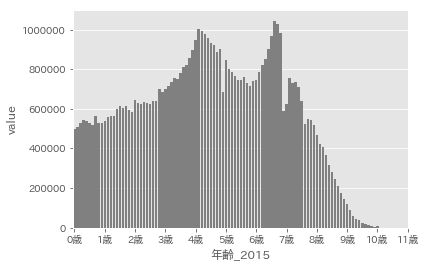

In [27]:
sns.barplot(x='年齢_2015',y='value',data=pop_man_filter, color='gray')
plt.xticks(np.arange(0,111,10))
plt.show()

## 3. plt.subplotを用いた人口ピラミッド
### 3.1. 前処理
- 男性と同様に、女性の全国年齢別人口データを取り出す。

In [49]:
pop_woman = population.query('cat01_code==0 & cat02_code==20 & cat03_code!=0 & area_code==0')
pop_woman_filter = pop_woman.iloc[:len(pop_man)-13,[5,7,13]]
pop_woman_filter.tail()

,男女別_2015,年齢_2015,value
981,女,96歳,71100.0
984,女,97歳,56900.0
987,女,98歳,42700.0
990,女,99歳,30700.0
993,女,100歳以上,61700.0


- 取り出した男性と女性の年齢別人口データを、年齢を主キーとして内部結合する。

In [53]:
df = pd.merge(pop_man_filter.iloc[:,[1,2]], pop_woman_filter.iloc[:,[1,2]], on='年齢_2015')
df.tail()

,年齢_2015,value_x,value_y
96,96歳,17800.0,71100.0
97,97歳,11200.0,56900.0
98,98歳,7800.0,42700.0
99,99歳,5600.0,30700.0
100,100歳以上,8800.0,61700.0


- 人口の列名が男性と女性でかぶっているため、列名を変更。

In [54]:
df.reset_index(drop=True, inplace=True)
df.columns = ['age', 'man', 'woman']
df.tail()

,age,man,woman
96,96歳,17800.0,71100.0
97,97歳,11200.0,56900.0
98,98歳,7800.0,42700.0
99,99歳,5600.0,30700.0
100,100歳以上,8800.0,61700.0


- 人口は見やすさのため、1万人単位で表示。

In [55]:
man = df['man'] / 10000
woman = df['woman'] / 10000

### 3.2. プロット
- pyplotのsubplotsで男女別にプロットし、人口ピラミッドを作成。

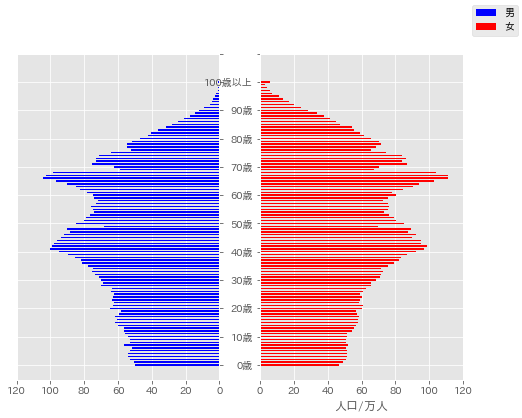

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6))

# Population of men.
ax[0].barh(df['age'], man, color='b', height=0.5, label='男')
ax[0].yaxis.tick_right() # 軸を右に
ax[0].set_yticks(np.array(range(0,111,10))) #　10歳刻み
ax[0].set_yticklabels([]) # こちらの軸ラベルは非表示
ax[0].set_xlim([120,0]) # x軸反転
# Population of women.
ax[1].barh(df['age'], woman, color='r', height=0.5, label='女')
ax[1].set_yticks(np.array(range(0,111,10)))
ax[1].set_xlim([0,120])
ax[1].set_xlabel('人口/万人')

fig.legend(loc='upper right')
plt.show()